<a href="https://colab.research.google.com/github/SriharshaGade/Music_Recommender_System/blob/main/MRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'> Recommendation Engines</h1>

### It is too important for online businesses, beyond to understanding and segment the customer, which have almost no physical interaction with their customers. Recommendation engines provide wonderful opportunities to these organizations to not only understand their clientele but also to use that information to increase their revenues. Another important advantage, you can easily integrate a crude recommendation engine in its interaction with the users and then, on the basis of its performance, make the decision to develop a more sophisticated version. 
### Recommendation engines are a way of modeling and rearranging information available about user preferences and then using this information to provide informed recommendations on the basis of that information.

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix
import math as mt
from scipy.sparse.linalg import * #used for matrix multiplication
from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix
from scipy.stats import skew, norm, probplot
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')


### Load the Data into the Userdefined Variable

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
#Read userid-songid-freq triplets
song_df_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data sets/data/kaggle/kaggle_visible_evaluation_triplets.txt',sep='\t',names=['user_id','song_id','freq'])

song_df_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data sets/data/kaggle/unique_tracks.txt',sep='<SEP>',names = ['track_id','song_id','artist_name','release'])

song_df_2.drop_duplicates(subset ="song_id",keep = False,inplace = True)

##Merge the two dataframes above to create input dataframe for recommender systems
song_df = pd.merge(song_df_1,song_df_2,how = "left" )

In [46]:
song_df.head()

,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


In [47]:
song_df[song_df['user_id'].isnull()]#checking whether the user_id name is present or not

,user_id,song_id,freq,track_id,artist_name,release


In [48]:
song_df[song_df['artist_name'].isnull()]#checking whether the artist name is present or not

,user_id,song_id,freq,track_id,artist_name,release
73,c34670d9c1718361feb93068a853cead3c95b76a,SOEHWGF12A6D4F8B2B,3,NaN,NaN,NaN
101,fdf6afb5daefb42774617cf223475c6013969724,SOONUTJ12A6701D7B4,1,NaN,NaN,NaN
109,fdf6afb5daefb42774617cf223475c6013969724,SOPWKOX12A8C139D43,1,NaN,NaN,NaN
110,10cbcd627472477dfbec90fb75017f8df6ce84ec,SOTNWCI12AAF3B2028,1,NaN,NaN,NaN
122,e9dc6b4c2b22aa6dc8260e1963021567728055b2,SOPXKYD12A6D4FA876,6,NaN,NaN,NaN
...,...,...,...,...,...,...
1450745,153832123c017bcdb1e55a9bec1eefcabd8bb2d1,SOQUJLT12A8C141F8A,3,NaN,NaN,NaN
1450749,ada735bfc101da8cf65ce71615138c3e08ea0e88,SOTSLEU12A6D4F8639,4,NaN,NaN,NaN
1450805,987b654b09b239f7c47751e0cfaa2990834cbb55,SODWYJZ12AB018240F,3,NaN,NaN,NaN
1450829,6b6d43eb0a1a6bdf471cebe380524946884746c6,SOUAUMW12A8C140570,1,NaN,NaN,NaN


In [49]:
if song_df['artist_name'].isnull().sum() > 0:
    song_df = song_df.dropna(axis = 0, subset = ['artist_name'])#removing the data whose artist name has nan

In [50]:
song_df[song_df['artist_name'].isnull()]#checking the artist name has nan  after removing some rows 

,user_id,song_id,freq,track_id,artist_name,release


In [51]:
song_df[song_df['release'].isnull()]#checking whether the release name is present or not

,user_id,song_id,freq,track_id,artist_name,release
192828,7b3a62a418862aefc4b3d85feb191fa0fd752c69,SOZDBDL12AB018AFFF,1,TROFVVS12903CDCA87,Sébastien Roch,NaN


In [52]:
missing_data = song_df.isnull()
missing_data.head(5)

,user_id,song_id,freq,track_id,artist_name,release
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [53]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

user_id
False    1411924
Name: user_id, dtype: int64

song_id
False    1411924
Name: song_id, dtype: int64

freq
False    1411924
Name: freq, dtype: int64

track_id
False    1411924
Name: track_id, dtype: int64

artist_name
False    1411924
Name: artist_name, dtype: int64

release
False    1411923
True           1
Name: release, dtype: int64



In [54]:
song_df[song_df['release'].isnull()]#checking whether the release name is present or not

,user_id,song_id,freq,track_id,artist_name,release
192828,7b3a62a418862aefc4b3d85feb191fa0fd752c69,SOZDBDL12AB018AFFF,1,TROFVVS12903CDCA87,Sébastien Roch,NaN


In [55]:
if song_df['release'].isnull().sum() > 0:
    song_df = song_df.dropna(axis = 0, subset = ['release'])

In [56]:
song_df[song_df['release'].isnull()]#checking whether the release name is present or not

,user_id,song_id,freq,track_id,artist_name,release


# clustering on Artist data

In [57]:
artist_data = song_df[['artist_name','freq']]
artist_data['artist_name'].value_counts()[0:5]
artist_aggr = artist_data.groupby('artist_name', as_index=False).sum()
artist_aggr.head()

,artist_name,freq
0,!!!,325
1,!Deladap,8
2,& And Oceans,9
3,'68 Comeback,49
4,'N Sync/Phil Collins,344


In [58]:
from sklearn.cluster import KMeans
km1 = KMeans(n_clusters=10)
artist_count = artist_aggr[['freq']]
artist_count.head()
km1.fit(artist_count)
label1= km1.labels_
artist_aggr['cluster_id'] = label1

In [59]:
artist_aggr[artist_aggr['cluster_id']==5]

,artist_name,freq,cluster_id
948,Alliance Ethnik,21603,5
2221,Barry Tuckwell/Academy of St Martin-in-the-Fie...,17124,5
10292,Harmonia,19461,5
11363,Jack Johnson,16570,5
12947,Justin Bieber,20971,5
14679,Linkin Park,17273,5
16489,Metallica,15975,5
18326,OneRepublic,20802,5
23922,The Black Keys,17366,5
26417,Train,21356,5


In [60]:
for i in range(11):
  print(artist_aggr[artist_aggr['cluster_id']==i].shape)

(2950, 3)
(25, 3)
(181, 3)
(5, 3)
(921, 3)
(10, 3)
(23749, 3)
(37, 3)
(375, 3)
(83, 3)
(0, 3)


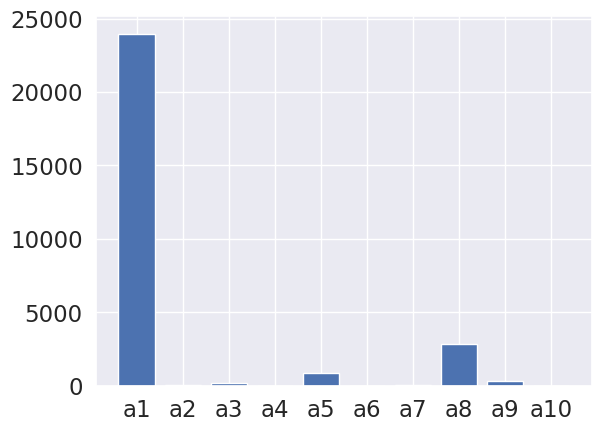

In [61]:
l=[23966,25,170,5,860,10,84,2826,355.36,0]
name=['a1','a2','a3','a4','a5','a6','a7','a8','a9','a10']
plt.bar(name,l)
plt.show()#in cluster 1 has most popular artist

# clustering on user data

In [62]:
user_data = song_df[['user_id','freq']]
user_aggr = user_data.groupby('user_id', as_index=False).sum()

In [63]:
user_aggr.head()

,user_id,freq
0,00007a02388c208ea7176479f6ae06f8224355b3,13
1,00014a76ed063e1a749171a253bca9d9a0ff1782,24
2,00015189668691680bb1a2e58afde1541ec92ced,101
3,0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,12
4,00020fcd8b01986a6a85b896ccde6c49f35142ad,44


In [64]:
user_count = user_aggr[['freq']]
km2 = KMeans(n_clusters=10)
km2.fit(user_count)
label2 = km2.labels_
user_aggr['cluster_id'] = label2

In [65]:
user_aggr[user_aggr['cluster_id']==3]

,user_id,freq,cluster_id
1812,04383d89810d0113066c28b631097711d2550b04,867,3
3701,08879a07270b36aaa09923890b221fdef1e9849e,867,3
3923,090b841eaf56d343a26625c2c6d08b823927bc4f,1305,3
12222,1c5aa998482a40abfd020759e7d757eb6c510e72,1187,3
14931,22bb29714137fa47083963c30e1a26f1bf517e7d,1141,3
21296,315103a41c2ced1143de0c2ba20de224800e6d89,1148,3
32526,4bacaff23c6edf0cdec81b2a71e0b01df9341734,852,3
38840,5a9375e46a7e9b869058c7bc0e820e00d77f3e0b,1184,3
44395,6779db1813c9a511383b9e7946fd88893a87db12,833,3
51343,77867fcbd93f3bf47f478a797f3bfabb0f561ea8,870,3


In [66]:
for i in range(11):
  print(artist_aggr[user_aggr['cluster_id']==i].shape)

(12024, 3)
(2274, 3)
(300, 3)
(6, 3)
(141, 3)
(7404, 3)
(1256, 3)
(35, 3)
(664, 3)
(4232, 3)
(0, 3)


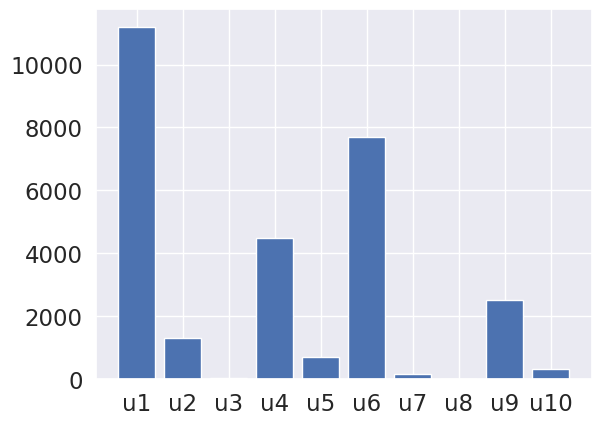

In [67]:
l=[11201,1285,36,4481,678,7704,147,6,2492,307]
name=['u1','u2','u3','u4','u5','u6','u7','u8','u9','u10']
plt.bar(name,l)
plt.show()

### The below dataframe shows how many times a unique user listened to a particular song, as well as the details of the song.

In [68]:
song_df.head()

,user_id,song_id,freq,track_id,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


### The Length of the Data

In [69]:
print("The Number of unique songs in the dataframe are ",len(song_df))

The Number of unique songs in the dataframe are  1411923


In [70]:
# Load the Data Set and MErge it
import pandas as pd
count_play_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data sets/data/kaggle/kaggle_visible_evaluation_triplets.txt',sep='\t',names=['user','song','play_count'])
track_metadata_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data sets/data/kaggle/unique_tracks.txt',sep='<SEP>',names = ['title','song_id','artist_name','release'])

In [71]:
track_metadata_df.drop_duplicates(subset ="song_id",keep = False,inplace = True)

In [72]:
user_song_list_count = pd.merge(count_play_df, 
                                track_metadata_df, how='left', 
                                left_on='song', 
                                right_on='song_id')
user_song_list_count.rename(columns={'play_count':'listen_count'},inplace=True)
del(user_song_list_count['song_id'])

In [73]:
display(user_song_list_count.head())
user_song_list_count.listen_count.describe().reset_index().T

,user,song,listen_count,title,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
listen_count,1.45093e+06,3.18715,7.05166,1,1,1,3,923


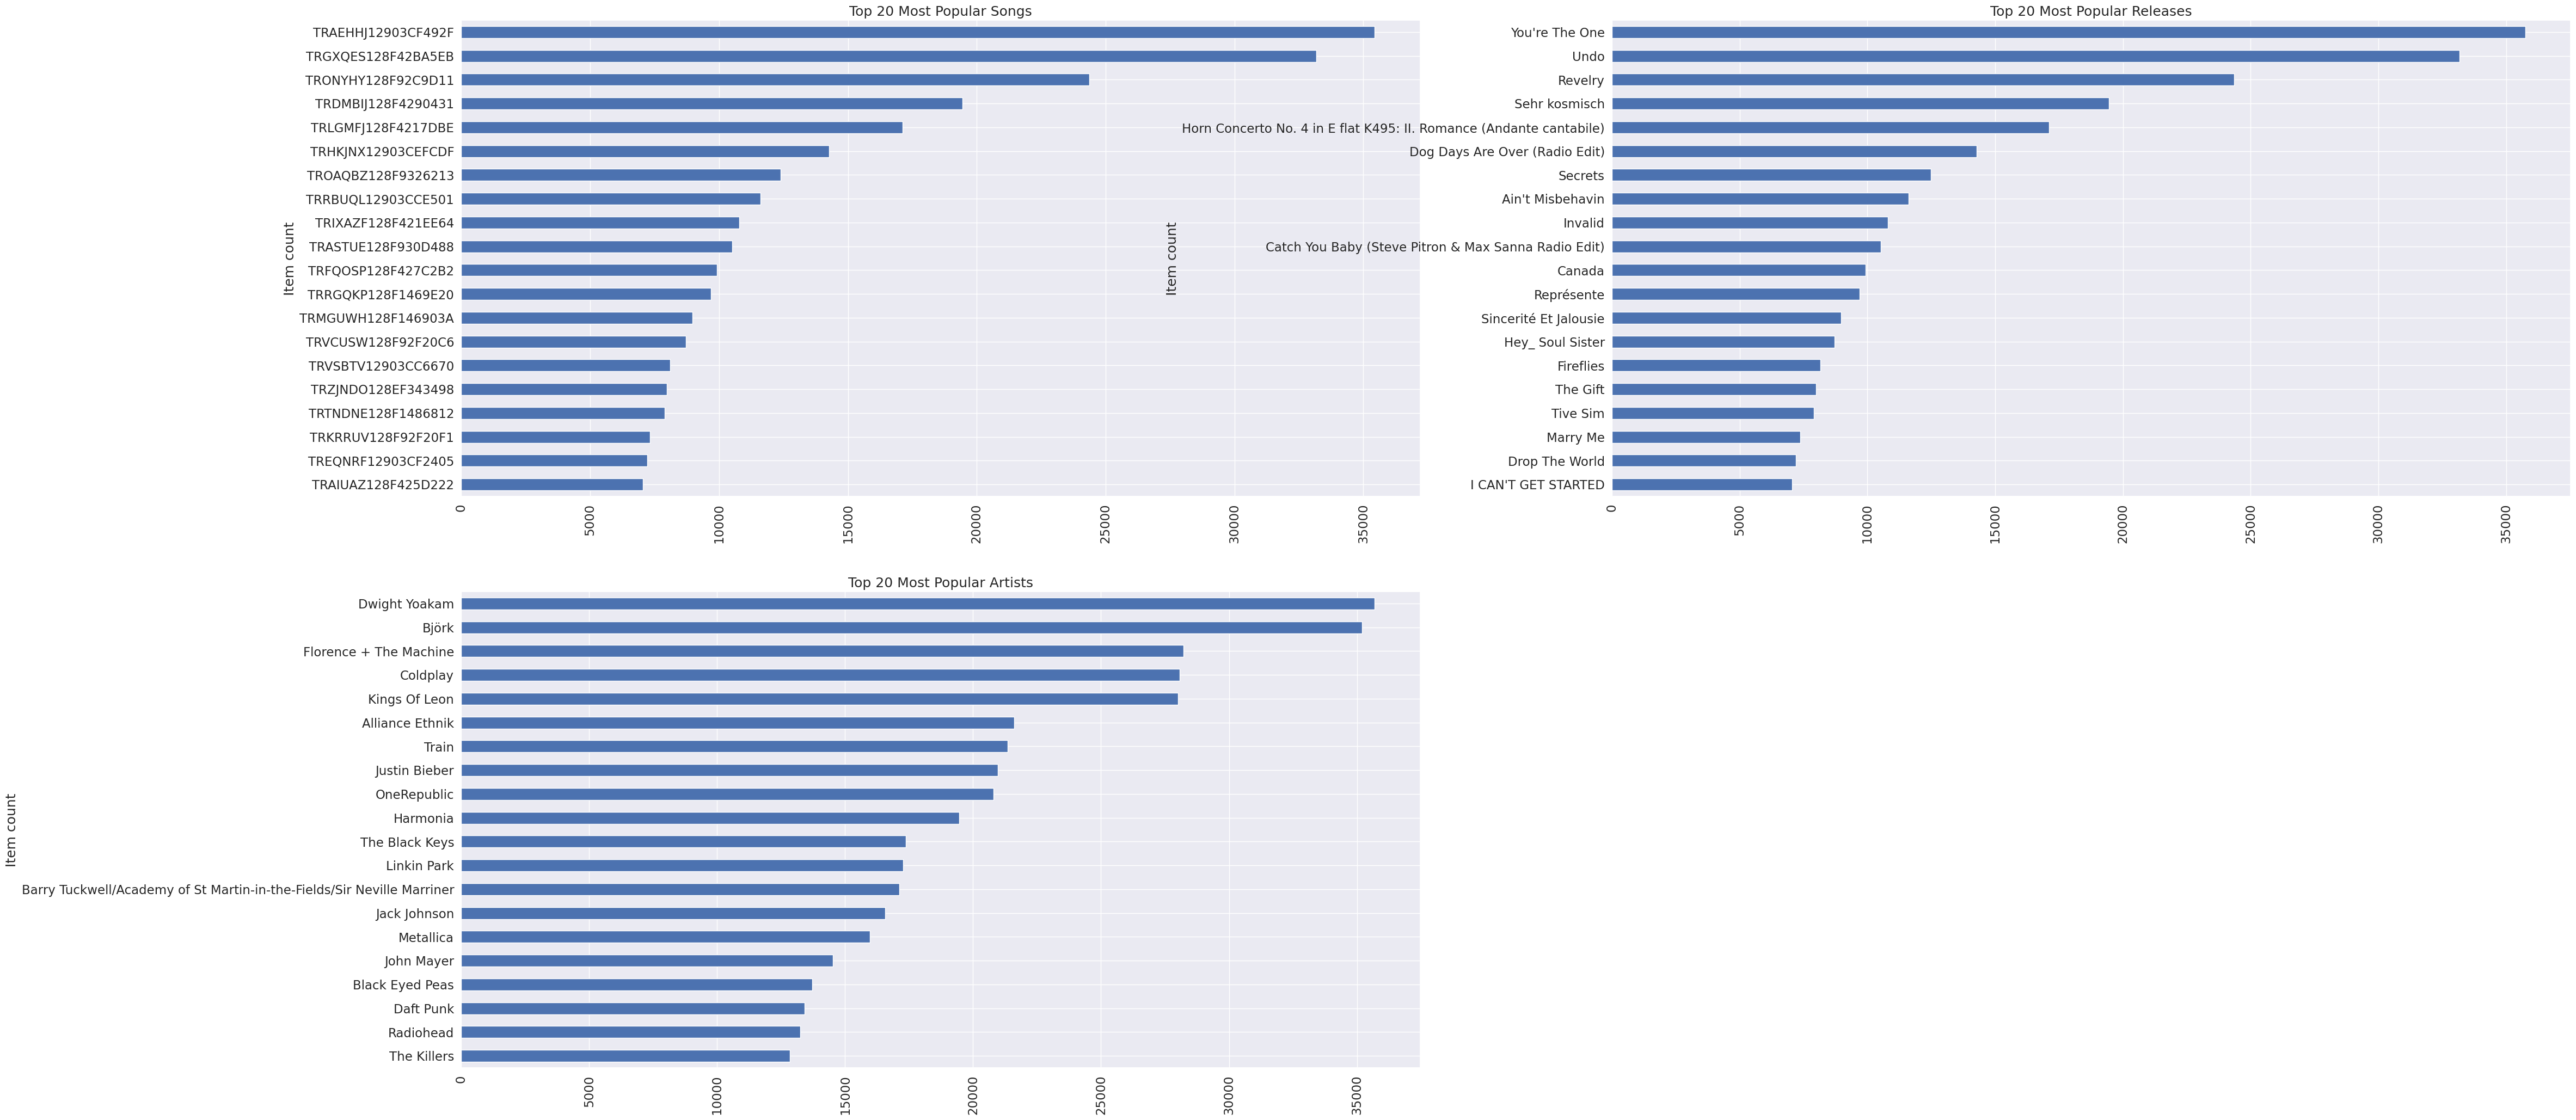

In [74]:
fig = plt.figure(figsize=(50, 25))
a1 = fig.add_subplot(221)
popular_songs = user_song_list_count[['title','listen_count']].groupby('title').sum().\
                sort_values('listen_count', ascending=False).head(20).sort_values('listen_count')
f1 = popular_songs.plot(kind='barh', title='Top 20 Most Popular Songs', legend=False, ax=a1)
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

a2 = fig.add_subplot(222)
popular_release = user_song_list_count[['release','listen_count']].groupby('release').sum().\
                sort_values('listen_count', ascending=False).head(20).sort_values('listen_count')
f2 = popular_release.plot(kind='barh', title='Top 20 Most Popular Releases', legend=False, ax=a2)
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

a3 = fig.add_subplot(223)
popular_artist = user_song_list_count[['artist_name','listen_count']].groupby('artist_name').sum().\
                sort_values('listen_count', ascending=False).head(20).sort_values('listen_count')
f1 = popular_artist.plot(kind='barh', title='Top 20 Most Popular Artists', legend=False, ax=a3)
plt.xticks(rotation='vertical')
plt.ylabel('Item count')

plt.show()

### So the two most obsessed fans did not influence any of the top 20.Let's take a look at the distribution of how many different songs each user listens to, first we create a summary dataset and next a function to help us with better visualization.

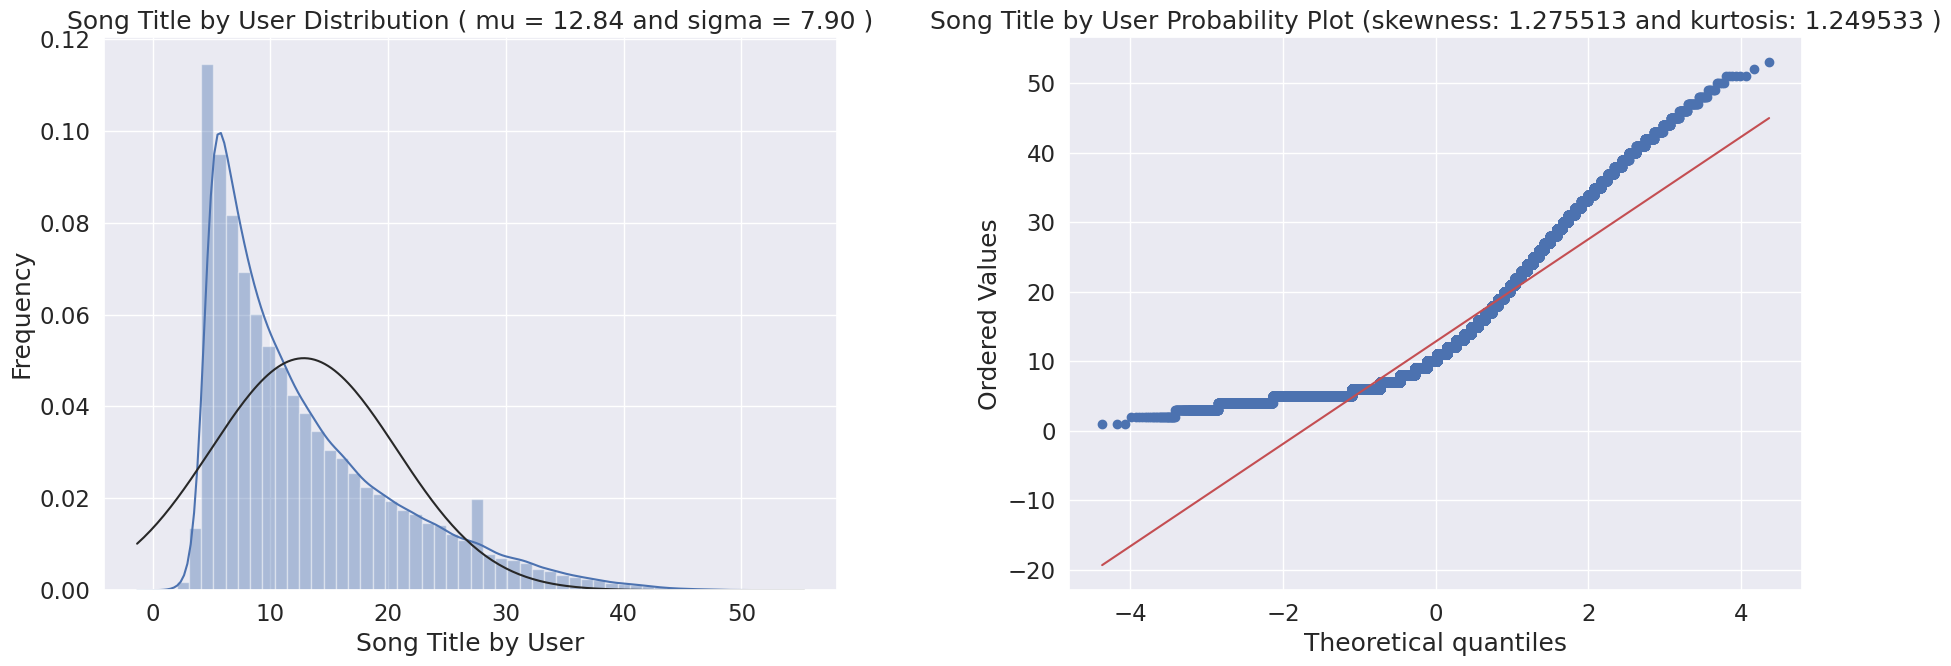

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
title,110000,12.8357,7.90037,1,7,10,17,53


In [75]:
user_song_count_distribution = user_song_list_count[['user','title']].groupby('user').count().\
                                reset_index().sort_values(by='title',ascending = False)

def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

QQ_plot(user_song_count_distribution.title, 'Song Title by User')
user_song_count_distribution.title.describe().reset_index().T

### From the first graph above we can see that song title by user distribution is skewed, has a peak on the left and a long tail to the right. It deviates from normal distribution and is positively biased.. As we expect, less than a hundred listen a good number of different songs, but enough to raise the average to above 26.

#### From the Probability Plot, we could see that song title by user also does not align with the diagonal red line which represent normal distribution. The form of its distribution confirm that is a skewed right.

####  With skewness positive of 4.2, we confirm the lack of symmetry and indicate that song title by user are skewed right, as we can see too at the song title by user distribution plot, skewed right means that the right tail is long relative to the left tail, as we expect in counts. The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

####  Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers, and positive kurtosis indicates a heavy-tailed distribution and negative kurtosis indicates a light tailed distribution. So, with 32.6 of positive kurtosis song title by user are heavy-tailed and definitely has outliers.

####  OK, let's take a look at the distribution of the number of times users heard the most popular song.

### First we create subset of the dataset

In [76]:
song_df = song_df.head(10000)

#Merge song title and artist_name columns to make a merged column
song_df['song'] = song_df['release'].map(str) + " - " + song_df['artist_name']

### The Most popular songs in data set 

In [77]:
song_grouped = song_df.groupby(['song']).agg({'freq': 'count'}).reset_index()
grouped_sum = song_grouped['freq'].sum()
song_grouped['percentage']  = song_grouped['freq'].div(grouped_sum)*100
song_grouped.sort_values(['freq', 'song'], ascending = [0,1])

,song,freq,percentage
7352,You're The One - Dwight Yoakam,41,0.41
5271,Sehr kosmisch - Harmonia,39,0.39
6749,Undo - Björk,39,0.39
4987,Revelry - Kings Of Leon,33,0.33
1527,Dog Days Are Over (Radio Edit) - Florence + Th...,29,0.29
...,...,...,...
7418,Árboles de la barranca - Carlos Y Jose,1,0.01
7419,Ännu En Dag - Drifters,1,0.01
7420,Ça Marche - Christophe Maé,1,0.01
7421,Örökké Tart - Tankcsapda,1,0.01


#### Second we have to count number of unique users in the data set

In [78]:
users = song_df['user_id'].unique()
print("The unique users in the data set is ",len(users))

The unique users in the data set is  776


### Third we have to count number of unique songs in the dataset

In [79]:
songs = song_df['song'].unique()
print("The unique songs present in the data set is ",len(songs))

The unique songs present in the data set is  7423


## Create Class for Popularity based Recommender System model

In [80]:
#Class for Popularity based Recommender System model
class popularity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

        #Get a count of user_ids for each unique song as recommendation score
        train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
    
        #Sort the songs based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)

    #Use the popularity based recommender system model to
    #make recommendations
    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['user_id'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations
    

#Class for Item similarity based Recommender System model
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.songs_dict = None
        self.rev_songs_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (songs) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item (song)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique items (songs) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_songs, all_songs):
            
        ####################################
        #Get users for all songs in user_songs.
        ####################################
        user_songs_users = []        
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)
           
        #############################################################
        #Calculate similarity between user songs and all unique songs
        #in the training data
        #############################################################
        for i in range(0,len(all_songs)):
            #Calculate unique listeners (users) of song (item) i
            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):       
                    
                #Get unique listeners (users) of song (item) j
                users_j = user_songs_users[j]
                    
                #Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_songs, user_songs):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user songs.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['user_id', 'song', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pd.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no songs for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
    
        user_songs = self.get_user_items(user) #A. Get all unique songs for this user    
            
        print("No. of unique songs for the user: %d" % len(user_songs))
    
        all_songs = self.get_all_items_train_data()  #B. Get all unique items (songs) in the training data
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_songs = item_list
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
         
        return df_recommendations

# Song Recommender <br>

# Split train test 

In [81]:
train_data, test_data = train_test_split(song_df, test_size = 0.20, random_state=0)
print(train_data.head(5))

                                       user_id  ...                                               song
7559  f70a3e53b17d9c293afc8b8e3e72bd19abb9ed0b  ...                                     DVNO - Justice
9505  8ce1b3edd86deeb6626741ad304af9b774bfcbbd  ...                        SexSlaveShip - Flying Lotus
3063  1d285c163eb0bf5f06132ea245b015a1be959b8f  ...                     To Have And To Hold - Deftones
5439  0e04fdf19a05462fd650c239b6fcaa726a26c688  ...                           Nerve Damage - Lifehouse
367   c732f882aa8d6db3bfaf8037d6418f27d3e07fc8  ...  Dog Days Are Over (Radio Edit) - Florence + Th...

[5 rows x 7 columns]


### WE have create Instance of the popularity_recommender_py() Class (MODEL)

In [82]:
pm = popularity_recommender_py()
pm.create(train_data, 'user_id', 'song')

### By using Popularity Model make some predictions

In [83]:
user_id = users[5]
pm.recommend(user_id)

,user_id,song,score,Rank
6066,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,You're The One - Dwight Yoakam,32,1.0
4380,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Sehr kosmisch - Harmonia,31,2.0
4151,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Revelry - Kings Of Leon,28,3.0
5573,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Undo - Björk,27,4.0
1284,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Dog Days Are Over (Radio Edit) - Florence + Th...,25,5.0
4370,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Secrets - OneRepublic,21,6.0
563,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Billionaire [feat. Bruno Mars] (Explicit Albu...,20,7.0
1686,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Fireflies - Charttraxx Karaoke,18,8.0
4138,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Représente - Alliance Ethnik,17,9.0
1384,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Drop The World - Lil Wayne / Eminem,16,10.0


### Point 1--->  Use the popularity based model to make predictions for the following user id (Note the difference in recommendations from the first user id).

In [84]:
user_id = users[8]
pm.recommend(user_id)

,user_id,song,score,Rank
6066,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,You're The One - Dwight Yoakam,32,1.0
4380,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,Sehr kosmisch - Harmonia,31,2.0
4151,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,Revelry - Kings Of Leon,28,3.0
5573,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,Undo - Björk,27,4.0
1284,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,Dog Days Are Over (Radio Edit) - Florence + Th...,25,5.0
4370,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,Secrets - OneRepublic,21,6.0
563,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,Billionaire [feat. Bruno Mars] (Explicit Albu...,20,7.0
1686,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,Fireflies - Charttraxx Karaoke,18,8.0
4138,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,Représente - Alliance Ethnik,17,9.0
1384,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,Drop The World - Lil Wayne / Eminem,16,10.0


<h1 align='center'> Collaborative filtering model</h1>

# creating an  model that allows us to make personalized recommendations to each user.

## Creating an instance of item similarity based recommender class

In [85]:
is_model = item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'song')

## Using the personalized model to make some song recommendations

In [86]:
#Print the songs for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data songs for the user userid: 91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62:
------------------------------------------------------------------------------------
Un Simple Histoire - Thievery Corporation
Passacaglia - Secret Garden
The Richest Man In Babylon - Thievery Corporation
Pastorale - Secret Garden
Until The Morning - Thievery Corporation
Kryptonite - 3 Doors Down
Illumination - Secret Garden
Love Letters - Dario Marianelli
In The Waiting Line - Zero 7
Big Yellow Taxi - Counting Crows / Vanessa Carlton
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 10
no. of unique songs in the training set: 6131
Non zero values in cooccurence_matrix :220


,user_id,song,score,rank
0,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,River Of Deceit - Mad Season,0.050000,1
1,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,She Follows Her Own Rules (2007 Digital Remast...,0.050000,2
2,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Gangsta Luv (Mayer Hawthorne G-Mix) - Snoop Dogg,0.050000,3
3,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Cómo Expresar Lo Que Siento - Binomio de Oro d...,0.050000,4
4,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Neighborhoods - Matthew Dear,0.050000,5
5,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Je Suis Malade - Lara Fabian,0.050000,6
6,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Your Red Dress (Wedding Song At Cemetery) - Al...,0.050000,7
7,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Banzai Pipeline - Henry Mancini & His Orchestra,0.050000,8
8,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Stay Forever - Ween,0.050000,9
9,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,Intro (Album Version) - Within Temptation,0.033333,10


## Step 2 - Use the personalized model to make recommendations for the following user id. (Note the difference in recommendations from the first user id.)

In [87]:
user_id = users[7]

user_items = is_model.get_user_items(user_id)

print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data songs for the user userid: c34670d9c1718361feb93068a853cead3c95b76a:
------------------------------------------------------------------------------------
Creep (Explicit) - Radiohead
You're The One - Dwight Yoakam
Quiero Verte Sonreir - Carlos Vives
Ain't Misbehavin - Sam Cooke
Undo - Björk
In The End (Album Version) - Linkin Park
Secrets - OneRepublic
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 7
no. of unique songs in the training set: 6131
Non zero values in cooccurence_matrix :1051


,user_id,song,score,rank
0,c34670d9c1718361feb93068a853cead3c95b76a,Cuando los ángeles lloran - Maná,0.071429,1
1,c34670d9c1718361feb93068a853cead3c95b76a,Rebelion - Joe Arroyo,0.071429,2
2,c34670d9c1718361feb93068a853cead3c95b76a,Repent - Shaggy,0.071429,3
3,c34670d9c1718361feb93068a853cead3c95b76a,No Te Pares - Ska-P,0.071429,4
4,c34670d9c1718361feb93068a853cead3c95b76a,Como Tu - Carlos Vives,0.071429,5
5,c34670d9c1718361feb93068a853cead3c95b76a,Fix You - Coldplay,0.054847,6
6,c34670d9c1718361feb93068a853cead3c95b76a,Heroe - Enrique Iglesias,0.047619,7
7,c34670d9c1718361feb93068a853cead3c95b76a,Dog Days Are Over (Radio Edit) - Florence + Th...,0.045221,8
8,c34670d9c1718361feb93068a853cead3c95b76a,Horn Concerto No. 4 in E flat K495: II. Romanc...,0.044389,9
9,c34670d9c1718361feb93068a853cead3c95b76a,Revelry - Kings Of Leon,0.041529,10


### We can also apply the model to find similar songs to any song in the dataset

In [88]:
is_model.get_similar_items(['U Smile - Justin Bieber'])

no. of unique songs in the training set: 6131
Non zero values in cooccurence_matrix :40


,user_id,song,score,rank
0,,Stuck In The Moment - Justin Bieber,0.40,1
1,,Rang De Basanti - Daler Mehndi;Chitra,0.25,2
2,,I Don't Have To Try - Avril Lavigne,0.25,3
3,,This Time Around - Hanson,0.25,4
4,,Real Feat. Sarah Green (Album Version) - Lupe ...,0.25,5
5,,Popquorn - Ceephax,0.25,6
6,,The Hazards Of Love 4 (The Drowned) - The Dece...,0.25,7
7,,the promise - New Found Glory,0.25,8
8,,Situations - Escape The Fate,0.25,9
9,,Piano & I - Alicia Keys,0.25,10


## Step 4 - Use the personalized recommender model to get similar songs for the following song.

In [89]:
song = 'Yellow - Coldplay'
is_model.get_similar_items([song])

no. of unique songs in the training set: 6131
Non zero values in cooccurence_matrix :0


,user_id,song,score,rank
0,,Pale Blue Eyes - The Velvet Underground,0.0,1
1,,Foreplay/Long Time - Boston,0.0,2
2,,Rejoicing In The Hands - Devendra Banhart,0.0,3
3,,Falling in Hate - Five Finger Death Punch,0.0,4
4,,St. Louis Tickle (Album Version) - Arlo Guthri...,0.0,5
5,,Ich Will - Rammstein,0.0,6
6,,Wissenswertes über Erlangen - Foyer Des Arts,0.0,7
7,,Goneja - Skinny Puppy,0.0,8
8,,Set It Off - Peaches,0.0,9
9,,Sk8er Boi - Cascada,0.0,10


In [90]:
song = 'Ella Elle L A - Kate Ryan'
is_model.get_similar_items([song])

no. of unique songs in the training set: 6131
Non zero values in cooccurence_matrix :11


,user_id,song,score,rank
0,,Ahora - Chetes,1.0,1
1,,O Ronco Da Cuica - Joao Bosco,1.0,2
2,,Ven Damelo - Daddy Yankee,1.0,3
3,,Y solo se me ocurre amarte (Unplugged) - Aleja...,1.0,4
4,,Sacred Flame - Carnal Forge,1.0,5
5,,El Tlatoani del barrio - Café Tacvba,1.0,6
6,,Frente A Frente - Bunbury,1.0,7
7,,Divine - SUPREME BEINGS OF LEISURE,1.0,8
8,,Alley Oop (Live) - George Thorogood And The De...,1.0,9
9,,Running Away - Kevin Blechdom,0.5,10


### Evaluation Model Class

In [91]:
#Class to calculate precision and recall

import random

class precision_recall_calculator():
    
    def __init__(self, test_data, train_data, pm, is_model):
        self.test_data = test_data
        self.train_data = train_data
        self.user_test_sample = None
        self.model1 = pm
        self.model2 = is_model
        
        self.ism_training_dict = dict()
        self.pm_training_dict = dict()
        self.test_dict = dict()
    
    #Method to return random percentage of values from a list
    def remove_percentage(self, list_a, percentage):
        k = int(len(list_a) * percentage)
        random.seed(0)
        indicies = random.sample(range(len(list_a)), k)
        new_list = [list_a[i] for i in indicies]
    
        return new_list
    
    #Create a test sample of users for use in calculating precision
    #and recall
    def create_user_test_sample(self, percentage):
        #Find users common between training and test set
        users_test_and_training = list(set(self.test_data['user_id'].unique()).intersection(set(self.train_data['user_id'].unique())))
        print("Length of user_test_and_training:%d" % len(users_test_and_training))

        #Take only random user_sample of users for evaluations
        self.users_test_sample = self.remove_percentage(users_test_and_training, percentage)

        print("Length of user sample:%d" % len(self.users_test_sample))
        
    #Method to generate recommendations for users in the user test sample
    def get_test_sample_recommendations(self):
        #For these test_sample users, get top 10 recommendations from training set
        #self.ism_training_dict = {}
        #self.pm_training_dict = {}

        #self.test_dict = {}

        for user_id in self.users_test_sample:
            #Get items for user_id from item similarity model
            print("Getting recommendations for user:%s" % user_id)
            user_sim_items = self.model2.recommend(user_id)
            self.ism_training_dict[user_id] = list(user_sim_items["song"])
    
            #Get items for user_id from popularity model
            user_sim_items = self.model1.recommend(user_id)
            self.pm_training_dict[user_id] = list(user_sim_items["song"])
    
            #Get items for user_id from test_data
            test_data_user = self.test_data[self.test_data['user_id'] == user_id]
            self.test_dict[user_id] = set(test_data_user['song'].unique() )
    
    #Method to calculate the precision and recall measures
    def calculate_precision_recall(self):
        #Create cutoff list for precision and recall calculation
        cutoff_list = list(range(1,11))


        #For each distinct cutoff:
        #    1. For each distinct user, calculate precision and recall.
        #    2. Calculate average precision and recall.

        ism_avg_precision_list = []
        ism_avg_recall_list = []
        pm_avg_precision_list = []
        pm_avg_recall_list = []


        num_users_sample = len(self.users_test_sample)
        for N in cutoff_list:
            ism_sum_precision = 0
            ism_sum_recall = 0
            pm_sum_precision = 0
            pm_sum_recall = 0
            ism_avg_precision = 0
            ism_avg_recall = 0
            pm_avg_precision = 0
            pm_avg_recall = 0

            for user_id in self.users_test_sample:
                ism_hitset = self.test_dict[user_id].intersection(set(self.ism_training_dict[user_id][0:N]))
                pm_hitset = self.test_dict[user_id].intersection(set(self.pm_training_dict[user_id][0:N]))
                testset = self.test_dict[user_id]
        
                pm_sum_precision += float(len(pm_hitset))/float(N)
                pm_sum_recall += float(len(pm_hitset))/float(len(testset))

                ism_sum_precision += float(len(ism_hitset))/float(len(testset))
                ism_sum_recall += float(len(ism_hitset))/float(N)
        
            pm_avg_precision = pm_sum_precision/float(num_users_sample)
            pm_avg_recall = pm_sum_recall/float(num_users_sample)
    
            ism_avg_precision = ism_sum_precision/float(num_users_sample)
            ism_avg_recall = ism_sum_recall/float(num_users_sample)

            ism_avg_precision_list.append(ism_avg_precision)
            ism_avg_recall_list.append(ism_avg_recall)
    
            pm_avg_precision_list.append(pm_avg_precision)
            pm_avg_recall_list.append(pm_avg_recall)
            
        return (pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list)
     

    #A wrapper method to calculate all the evaluation measures
    def calculate_measures(self, percentage):
        #Create a test sample of users
        self.create_user_test_sample(percentage)
        
        #Generate recommendations for the test sample users
        self.get_test_sample_recommendations()
        
        #Calculate precision and recall at different cutoff values
        #for popularity mode (pm) as well as item similarity model (ism)
        
        return self.calculate_precision_recall()
        #return (pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list)  

### Comparison between the models
#### We now formally compare the popularity and the personalized models.

#### We use the precision recall calculator class to calculate the evaluation measures

In [92]:

start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:665
Length of user sample:33
Getting recommendations for user:5e42837bcbbfd9c103483e924daf302f41d1d559
No. of unique songs for the user: 6
no. of unique songs in the training set: 6131
Non zero values in cooccurence_matrix :190
Getting recommendations for user:9ca08e25a5c4144b1f2cd6890d8cb65717e7c73e
No. of unique songs for the user: 17
no. of unique songs in the training set: 6131
Non zero values in cooccurence_matrix :1782
Getting recommendations for user:89ba5229ec24a4353d5b3905289ccd2753afb570
No. of unique songs for the user: 1
no. of unique songs in the training set: 6131
Non zero values in cooccurence_matrix :1
Getting recommendations for user:778e05c8586ff80e804d2815d7ffc1e583df98dd
No. of unique songs for the user: 11
no. of unique songs in the training set: 6131
Non zero values in cooccurence_matrix :291
Getting recommendations for user:f12f89ba556ed9c561e5b14ddfa5790d79006a82
No. of unique songs for the user: 23
no. of unique songs in the tra

### plot precision recall curve

In [93]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.20])
    pl.xlim([0.0, 0.20])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


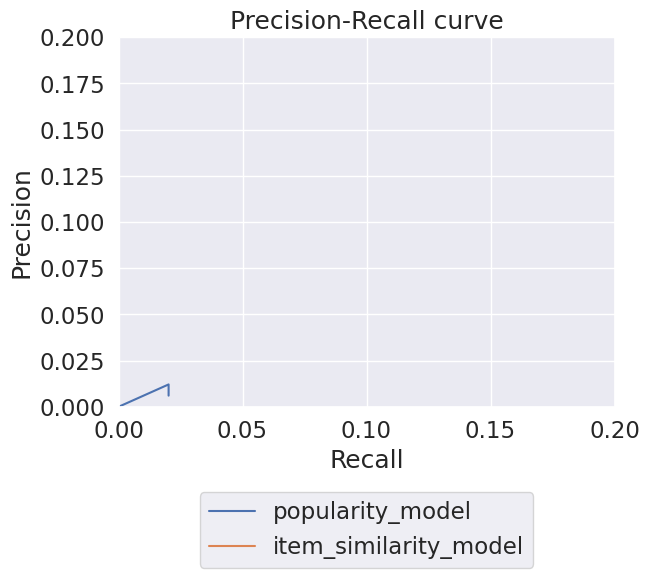

In [94]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

## SVD (Singular Value Decomposition) Based REcommender System 

### Using SVD matrix factorization based collaborative filtering recommender system

#### The following code implements a Singular Value Decomposition (SVD) based matrix factorization collaborative filtering recommender system. The user ratings matrix used is a small matrix as follows: Item0 Item1 Item2 Item3 User0 3 1 2 3 User1 4 3 4 3 User2 3 2 1 5 User3 1 6 5 2 User4 0 0 5 0 As we can see in the above matrix, all users except user 4 rate all items. The code calculates predicted recommendations for user 4.

#### Import Required Libraries 

In [95]:
!pip install scipy
!pip install cython
!pip install sparsesvd

  Created wheel for sparsesvd: filename=sparsesvd-0.2.2-cp37-cp37m-linux_x86_64.whl size=295877 sha256=4fa20f93cde7215d4044e2c9a108e9db678d6d9c2bf9859d8eca50538a7ea2cc
  Stored in directory: /root/.cache/pip/wheels/23/17/02/81e370c9cddef7ef9e5454d71bbe8be2eafa8e84c0b7b628b1
Successfully built sparsesvd


In [96]:
import math as mt
import csv
from sparsesvd import sparsesvd #used for matrix factorization
import numpy as np
from scipy.sparse import csc_matrix #used for sparse matrix
from scipy.sparse.linalg import * #used for matrix multiplication

#### Methods to compute SVD and recommendations

In [97]:
#constants defining the dimensions of our User Rating Matrix (URM)
MAX_PID = 4
MAX_UID = 5

#Compute SVD of the user ratings matrix
def computeSVD(urm, K):
    U, s, Vt = sparsesvd(urm, K)

    dim = (len(s), len(s))
    S = np.zeros(dim, dtype=np.float32)
    for i in range(0, len(s)):
        S[i,i] = mt.sqrt(s[i])

    U = csc_matrix(np.transpose(U), dtype=np.float32)
    S = csc_matrix(S, dtype=np.float32)
    Vt = csc_matrix(Vt, dtype=np.float32)
    
    return U, S, Vt

#Compute estimated rating for the test user
def computeEstimatedRatings(urm, U, S, Vt, uTest, K, test):
    rightTerm = S*Vt 

    estimatedRatings = np.zeros(shape=(MAX_UID, MAX_PID), dtype=np.float16)
    for userTest in uTest:
        prod = U[userTest, :]*rightTerm
        #we convert the vector to dense format in order to get the indices 
        #of the movies with the best estimated ratings 
        estimatedRatings[userTest, :] = prod.todense()
        recom = (-estimatedRatings[userTest, :]).argsort()[:250]
    return recom

#### Use SVD to make predictions for a test user id

In [98]:
#Used in SVD calculation (number of latent factors)
K=2

#Initialize a sample user rating matrix
urm = np.array([[3, 1, 2, 3],[4, 3, 4, 3],[3, 2, 1, 5], [1, 6, 5, 2], [5, 0,0 , 0]])
urm = csc_matrix(urm, dtype=np.float32)

#Compute SVD of the input user ratings matrix
U, S, Vt = computeSVD(urm, K)

#Test user set as user_id 4 with ratings [0, 0, 5, 0]
uTest = [4]
print("User id for whom recommendations are needed: %d" % uTest[0])

#Get estimated rating for test user
print("Predictied ratings:")
uTest_recommended_items = computeEstimatedRatings(urm, U, S, Vt, uTest, K, True)
print(uTest_recommended_items)

User id for whom recommendations are needed: 4
Predictied ratings:
[0 3 2 1]


#### Understanding Intuition behind SVD

#### SVD result gives three matrices as output: U, S and Vt (T in Vt means transpose). Matrix U represents user vectors and Matrix Vt represents item vectors. In simple terms, U represents users as 2 dimensional points in the latent vector space, and Vt represents items as 2 dimensional points in the same space. Next, we print the matrices U, S and Vt and try to interpret them. Think how the points for users and items will look like in a 2 dimensional axis. For example, the following code plots all user vectors from the matrix U in the 2 dimensional space. Similarly, we plot all the item vectors in the same plot from the matrix Vt.

Matrix Dimensions for U
(5, 2)


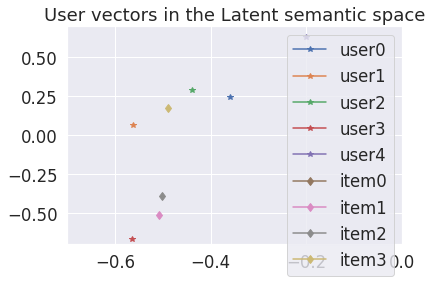

In [99]:
%matplotlib inline
from pylab import *

#Plot all the users
print("Matrix Dimensions for U")
print(U.shape)

for i in range(0, U.shape[0]):
    plot(U[i,0], U[i,1], marker = "*", label="user"+str(i))

for j in range(0, Vt.T.shape[0]):
    plot(Vt.T[j,0], Vt.T[j,1], marker = 'd', label="item"+str(j))    
    
legend(loc="upper right")
title('User vectors in the Latent semantic space')
ylim([-0.7, 0.7])
xlim([-0.7, 0])
show()